## Problem 2

In [1]:
import torch

x = torch.tensor(range(0, 60)).view((3,4,5))
print(x)
print(x.shape)

c:\Users\kkgg3\.conda\envs\cv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49],
         [50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]])
torch.Size([3, 4, 5])


1. ```tensor([0, 1, 2, 3, 4])```

In [2]:
x[0,0,:] # or x[0,0,] or x[0,0]

tensor([0, 1, 2, 3, 4])

2. ```tensor([43, 48, 53, 58])```

In [3]:
x[2,:,3]

tensor([43, 48, 53, 58])

3. ```tensor([[0, 2, 4], [5, 7, 9], [10, 12 ,14], [15, 17, 19]])```

In [4]:
x[0, :, 0:5:2]

tensor([[ 0,  2,  4],
        [ 5,  7,  9],
        [10, 12, 14],
        [15, 17, 19]])

4. ```tensor([[[10,11], [15,16]], [[30,31],[35,36]], [[50,51],[55,56]]])```

In [5]:
x[:, 2:4, 0:2]

tensor([[[10, 11],
         [15, 16]],

        [[30, 31],
         [35, 36]],

        [[50, 51],
         [55, 56]]])

## Problem 3
**1. What are the requirements on the shapes of $x$ and $y$ in order for the product $xy$ to be defined?**

Suppose shapes(dimension) of $x$ and $y$ are $m_x \times n_x$ and $m_y \times n_y$ respectively. Then requirements on the shapes of $x$ and $y$ in order for the product $xy$ to be defined is $$n_x = m_y$$

**2. What are additional requirements on the shapes of $x$ and $y$ in order for $tr(xy)$ to be defined?**

$tr(\cdot)$ is only defined on square matrix. Thus $xy$ to be square matrix, it has to be $$m_x = n_y$$

**3. Experiment with a handful of different matricies $x$ and $y$ with different shapes (subject to the requirements you found above) to see whether in general $xy = yx$ and $tr(xy)=tr(yx)$.**


**4. Write a script which randomly generates 10 pairs of a $3 \times 4$ matrix $x$ and a $4 \times 3$ matrix $y$ with integer coefficients between $-5$ and $5$, and checks whether $xy=yx$ and $tr(xy) = tr(yx)$. What are your findings?**

First of all, shapes of $xy$ and $yx$ are $3\times 3$ and $4\times 4$ respectively, thus $xy \neq yx$.

Also, $tr(xy) = tr(yx)$ in the experiments. And it can be proven that this is always true.

In [6]:
import numpy as np
for _ in range(10):
    x = np.random.randint(-5,6, (3,4))
    print(f'x: {x}')
    y = np.random.randint(-5,6, (4,3))
    print(f'y: {y}')
    xy = np.matmul(x,y)
    print(f'xy: {xy}')
    yx = np.matmul(y,x)
    print(f'yx: {yx}')
    print(f'xy=yx? {xy==yx}')
    trxy = np.matrix.trace(xy)
    print(f'tr(xy): {trxy}')
    tryx = np.matrix.trace(yx)
    print(f'tr(yy): {tryx}')
    print(f'tr(xy)=tr(yx)? {trxy == tryx}')
    print()


x: [[-1 -4 -4 -4]
 [ 0  5  5  3]
 [-3  5  4  4]]
y: [[ 4 -3  2]
 [-5  1 -4]
 [-3  3 -2]
 [-3 -1 -1]]
xy: [[ 40  -9  26]
 [-49  17 -33]
 [-61  22 -38]]
yx: [[-10 -21 -23 -17]
 [ 17   5   9   7]
 [  9  17  19  13]
 [  6   2   3   5]]
xy=yx? False
tr(xy): 19
tr(yy): 19
tr(xy)=tr(yx)? True

x: [[-4  4  5  1]
 [ 4  2 -4  4]
 [ 1  1 -1  1]]
y: [[-4 -4  5]
 [-2 -3 -2]
 [-1  3 -3]
 [-4 -3 -4]]
xy: [[ -1  16 -47]
 [-32 -46  12]
 [ -9 -13   2]]
yx: [[  5 -19  -9 -15]
 [ -6 -16   4 -16]
 [ 13  -1 -14   8]
 [  0 -26  -4 -20]]
xy=yx? False
tr(xy): -45
tr(yy): -45
tr(xy)=tr(yx)? True

x: [[ 1  4 -1 -1]
 [-5  1  4  3]
 [ 2 -4  0 -5]]
y: [[-2  2  4]
 [ 4  3  1]
 [-2  1 -1]
 [-4  1 -2]]
xy: [[ 20  12  11]
 [ -6   0 -29]
 [  0 -13  14]]
yx: [[ -4 -22  10 -12]
 [ -9  15   8   0]
 [ -9  -3   6  10]
 [-13  -7   8  17]]
xy=yx? False
tr(xy): 34
tr(yy): 34
tr(xy)=tr(yx)? True

x: [[-2  0 -5  5]
 [-2 -1  5 -1]
 [ 3 -4 -1 -1]]
y: [[ 0 -2  2]
 [-5  4 -3]
 [-1  3  5]
 [ 4  2  3]]
xy: [[ 25  -1 -14]
 [ -4  13  21]

c:\Users\kkgg3\.conda\envs\cv\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


## Problem 4

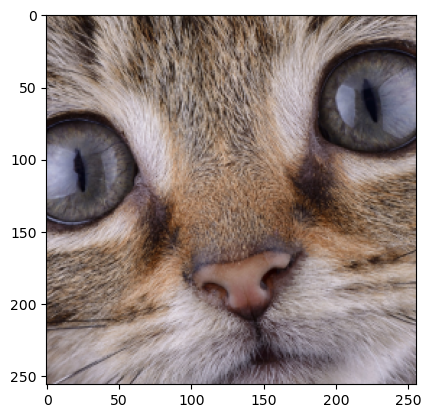

In [7]:
import matplotlib.pyplot as plt
import os
import torch

batch_size = 3
batch = torch.zeros(batch_size, 256, 256, 3)

data_dir = './dlwpt-code-master/data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir)
            if os.path.splitext(name)[-1] == '.png']

for i, filename in enumerate(filenames):
    img_arr = plt.imread(os.path.join(data_dir, filename))
    img_t = torch.Tensor(img_arr)
    img_t = img_t[:, :, :3]
    batch[i] = img_t

plt.imshow(batch[0, :, :, :])
plt.show()

**1. Find a simple tensor manipulation to "downsample" the $256\times 256$ images to $32 \times 32$ images, and plot the result. The result should look like the first image below.**

c:\Users\kkgg3\.conda\envs\cv\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3281.)


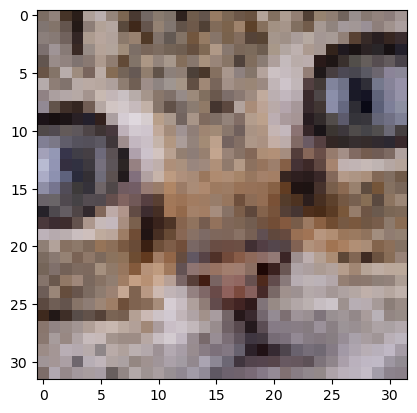

In [8]:
import matplotlib.pyplot as plt
import os
import torch
import torchvision.transforms as tf

batch_size = 3
batch = torch.zeros(batch_size, 256, 256, 3)

data_dir = './dlwpt-code-master/data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir)
            if os.path.splitext(name)[-1] == '.png']

for i, filename in enumerate(filenames):
    img_arr = plt.imread(os.path.join(data_dir, filename))
    img_t = torch.Tensor(img_arr)
    img_t = img_t[:, :, :3]
    batch[i] = img_t

plt.imshow(tf.Resize(size=(32,32))((batch[0, :, :, :].T)).T)
plt.show()

**2. Find a simple tensor manipulation to overlay the three images together, and plot the result. The result should look like the second image below.**

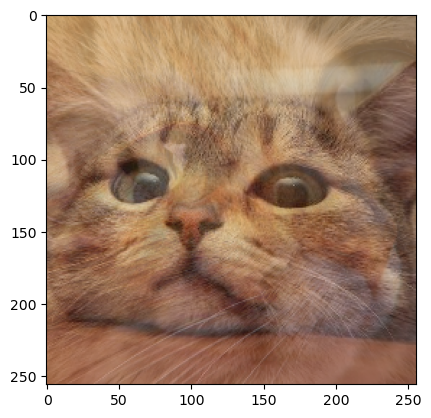

In [12]:
import matplotlib.pyplot as plt
import os
import torch
from PIL import Image

data_dir = './dlwpt-code-master/data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir)
            if os.path.splitext(name)[-1] == '.png']

for i, filename in enumerate(filenames):
    img = Image.open(os.path.join(data_dir, filename))
    if i == 0:
        stacked = img
    else: 
        stacked = Image.blend(stacked, img, 0.5)

plt.imshow(stacked)
plt.show()

**3. Find a way to change the order of the RGB channels by directly manipulating the tensor, and plot the result. The result might look like the third image below, but different results are possible depending on the permutation.**

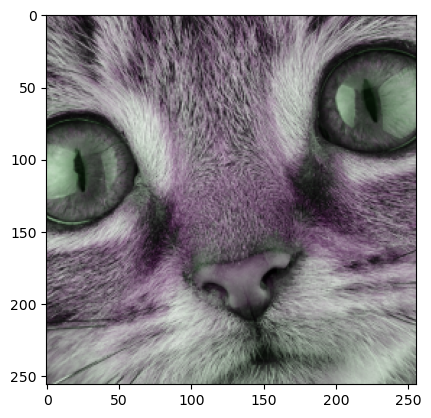

In [29]:
import matplotlib.pyplot as plt
import os
import torch

batch_size = 3
batch = torch.zeros(batch_size, 256, 256, 3)

data_dir = './dlwpt-code-master/data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir)
            if os.path.splitext(name)[-1] == '.png']

for i, filename in enumerate(filenames):
    img_arr = plt.imread(os.path.join(data_dir, filename))
    img_t = torch.Tensor(img_arr)
    img_t = img_t[:, :, :3]
    for r in range(256):
        for c in range(256):
            img_t[r][c][0],img_t[r][c][1],img_t[r][c][2] = img_t[r][c][1],img_t[r][c][2],img_t[r][c][0]
    batch[i] = img_t
plt.imshow(batch[0, :, :, :])
plt.show()